# Rhyme

In [3]:
# !pip install -r ../requirements.txt
import sys
sys.path.append('../')
from generative_formalism import *
import plotnine as p9
pd.options.display.max_rows = 25
p9.options.dpi=300
p9.options.figure_size=(10,5)

In [4]:
txt = """
From fairest creatures we desire increase,
That thereby beauty’s rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory;
But thou, contracted to thine own bright eyes,
Feed’st thy light’s flame with self-substantial fuel,
Making a famine where abundance lies,
Thyself thy foe, to thy sweet self too cruel.
Thou that art now the world’s fresh ornament
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And, tender churl, mak’st waste in niggarding.
   Pity the world, or else this glutton be,
   To eat the world’s due, by the grave and thee.
"""

get_rhyme_for_txt(txt)

{'num_rhyming_lines': 11,
 'num_perfectly_rhyming_lines': 5,
 'num_lines': 14,
 'rhyming_line_pairs': [('From fairest creatures we desire increase,',
   'But as the riper should by time decease,',
   0.7637626158259733),
  ('But thou, contracted to thine own bright eyes,',
   'Making a famine where abundance lies,',
   0),
  ("Feed'st thy light's flame with self-substantial fuel,",
   'Thyself thy foe, to thy sweet self too cruel.',
   0.7637626158259733),
  ("Thou that art now the world's fresh ornament",
   'Within thine own bud buriest thy content,',
   0.8539125638299666),
  ('His tender heir might bear his memory;',
   'Pity the world, or else this glutton be,',
   0),
  ('Pity the world, or else this glutton be,',
   "To eat the world's due, by the grave and thee.",
   0)]}

In [5]:
df_smpl = get_chadwyck_corpus_sampled_by_rhyme_as_in_paper()
print(len(df_smpl))
df_rhyme_data_in_paper = get_rhyme_for_sample(df_smpl)
print(len(df_rhyme_data_in_paper))
df_rhyme_data_in_paper

2000


100%|██████████| 2000/2000 [00:17<00:00, 116.00it/s]

2000


,id,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,...,num_perfectly_rhyming_lines,num_lines_prosodic,rhyming_line_pairs,perc_rhyming_lines,perc_perfectly_rhyming_lines,num_rhyming_lines_per10l,num_perfectly_rhyming_lines_per10l,rhyme_bool,rhyme_pred,rhyme_pred_perc
id_hash,,,,,,,,,,,,,,,,,,,,,
1,english-ed2/ep2438/Z300661875,,English Poetry,"Price, Herbert, b. 1858",1858.0,THE FORSAKEN GARDEN,1888,35,Poems and Sonnets by Herbert Price (1914),"In the garden we loved that is now a waste,",...,25.0,35.0,"[(Ah! sweet were the days, and the nights and ...",100.000000,71.428571,10,7,True,True,100
1,english/pennecu1/Z200459978,1660-1700 Restoration,English Poetry,"Pennecuik, Alexander, 1652-1722",1652.0,THE CITY AND COUNTRY MOUSE.,1682,50,The Works (1815),"&indent;Met with a city mouse, right smooth an...",...,25.0,35.0,"[(Ah! sweet were the days, and the nights and ...",100.000000,71.428571,10,7,True,True,100
2,english/wattsisa/Z300523040,1750-1799 Later Eighteenth-Century,English Poetry,"Watts, Isaac, 1674-1748",1674.0,SONG 11. Heaven and Hell.,1704,16,The Works (1810),&indent;A heav'n of joy and love;,...,14.0,16.0,"[(There is beyond the sky, And holy children, ...",93.750000,87.500000,9,9,True,True,100
3,english/hardytho/Z200137433,1870-1899 Later Nineteenth-Century,English Poetry,"Hardy, Thomas, 1840-1928",1840.0,WHEN DEAD,1870,16,,&indent;&indent;I am under the bough;,...,8.0,16.0,"[(I am under the bough;, Than I am now., 0), (...",62.500000,50.000000,6,5,True,True,100
4,english/fawkesfr/Z300372956,1750-1799 Later Eighteenth-Century,English Poetry,"Fawkes, Francis, 1720-1777",1720.0,"III. ON A WORTHY FRIEND, Who was accomplished...",1750,10,Original Poems and Translations (1761),"Thou friendly, candid, virtuous mind, farewel!",...,8.0,10.0,"[(To speak thy praise all eloquence is faint,,...",80.000000,80.000000,8,8,True,True,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,english-ed2/ep2525/Z200668962,,English Poetry,"Armstrong, Edmund John, 1841-1865",1841.0,WOMAN'S SORROW.,1871,14,The Poetical Works of Edmund J. Armstrong. Edi...,"Tost by a tempest, and ere long in calm",...,0.0,14.0,"[(Tost by a tempest, and ere long in calm, Sub...",78.571429,0.000000,8,0,False,False,0
219130,english-ed2/ep2316/Z200654162,,English Poetry,"Collins, Mortimer, 1827-1876",1827.0,A CAVALIER BALLAD.,1857,37,Idyls and Rhymes. By Mortimer Collins (1855),"Who is gone, in his glory and his sorrow, to the",...,18.0,37.0,[(O alas and alas for the King we could not sa...,86.486486,48.648649,9,5,False,True,100
219174,english/colersam/Z300317124,1800-1834 Early Nineteenth-Century,English Poetry,"Coleridge, Samuel Taylor, 1772-1834",1772.0,TO THE REV. GEORGE COLERIDGE OF OTTERY ST. MA...,1802,77,The Complete Poetical Works (1912),Notus in fratres animi paterni.,...,8.0,76.0,[(To the same dwelling where his father dwelle...,59.210526,10.526316,6,1,False,False,0


## Testing rhyme measurement

In [6]:
def get_rhyming_accuracy_by_rhyme_threshold(df, pred_by=RHYME_PRED_FEATURE):
    df=df.copy()
    df=df[df.rhyme.isin({'y','n'})]
    ld=[]
    for opt in df[pred_by].unique():
        df['rhyme_pred'] = df[pred_by].apply(lambda x: x>=opt)
        d=get_pred_stats(df.rhyme_pred, df.rhyme_bool)
        d['support'] = len(df)
        ld.append({'pred_by':pred_by, 'opt':opt, **d})
    return pd.DataFrame(ld).groupby(['pred_by','opt']).median()

In [7]:
df_preds_in_paper = get_rhyming_accuracy_by_rhyme_threshold(df_rhyme_data_in_paper).sort_values('f1_score', ascending=False)
df_preds_in_paper

f1_score  precision  recall  accuracy  true_positives  false_positives  true_negatives  false_negatives  support
pred_by                            opt                                                                                                                  
num_perfectly_rhyming_lines_per10l 4    0.887129   0.878431   0.896    0.8860           896.0            124.0           876.0            104.0   2000.0
                                   3    0.878816   0.817556   0.950    0.8690           950.0            212.0           788.0             50.0   2000.0
                                   5    0.837085   0.901848   0.781    0.8480           781.0             85.0           915.0            219.0   2000.0
                                   2    0.823529   0.710145   0.980    0.7900           980.0            400.0           600.0             20.0   2000.0
                                   6    0.757202   0.918688   0.644    0.7935           644.0             57.0           943.0            356.0   2000.0
                                   1    0.744449   0.596862   0.989    0.6605           989.0            668.0           332.0             11.0   2000.0
                                   0    0.666667   0.500000   1.000    0.5000          1000.0           1000.0             0.0              0.0   2000.0
                                   7    0.561281   0.924312   0.403    0.6850           403.0             33.0           967.0            597.0   2000.0
                                   8    0.339315   0.920354   0.208    0.5950           208.0             18.0           982.0            792.0   2000.0
                                   9    0.131848   0.922078   0.071    0.5325            71.0              6.0           994.0            929.0   2000.0
                                   10   0.015857   0.888889   0.008    0.5035             8.0              1.0           999.0            992.0   2000.0

In [8]:
def get_rhyming_preds_table(df_preds, save_latex_to=None):
    df_preds_tbl = df_preds.reset_index().drop('pred_by',axis=1)[['opt','precision','recall','f1_score',]].set_index('opt').sort_index()
    df_preds_tbl.columns = ['Precision', 'Recall', 'F1 score']
    df_preds_tbl.rename_axis('# Rhymes per 10 lines', inplace=True)
    df_preds_tbl = df_preds_tbl.round(2).applymap(lambda x: f'{x*100:.0f}%')
    
    if save_latex_to:
        df_preds_tbl_latex = df_preds_tbl.copy()
        df_preds_tbl_latex.rename_axis(df_preds_tbl_latex.index.name.replace('#', '\#'), inplace=True)
        df_preds_tbl_latex.columns = [x.replace('#', '\#') for x in df_preds_tbl_latex.columns]

        os.makedirs(os.path.dirname(save_latex_to), exist_ok=True)
        df_preds_tbl_latex.to_latex(save_latex_to)
    
    return df_preds_tbl

df_preds_tbl_in_paper = get_rhyming_preds_table(df_preds_in_paper, save_latex_to=os.path.join(PATH_TEX, 'table_5.rhyme_accuracy.tex'))
df_preds_tbl_in_paper

,Precision,Recall,F1 score
# Rhymes per 10 lines,,,
0,50%,100%,67%
1,60%,99%,74%
2,71%,98%,82%
3,82%,95%,88%
4,88%,90%,89%
5,90%,78%,84%
6,92%,64%,76%
7,92%,40%,56%
8,92%,21%,34%


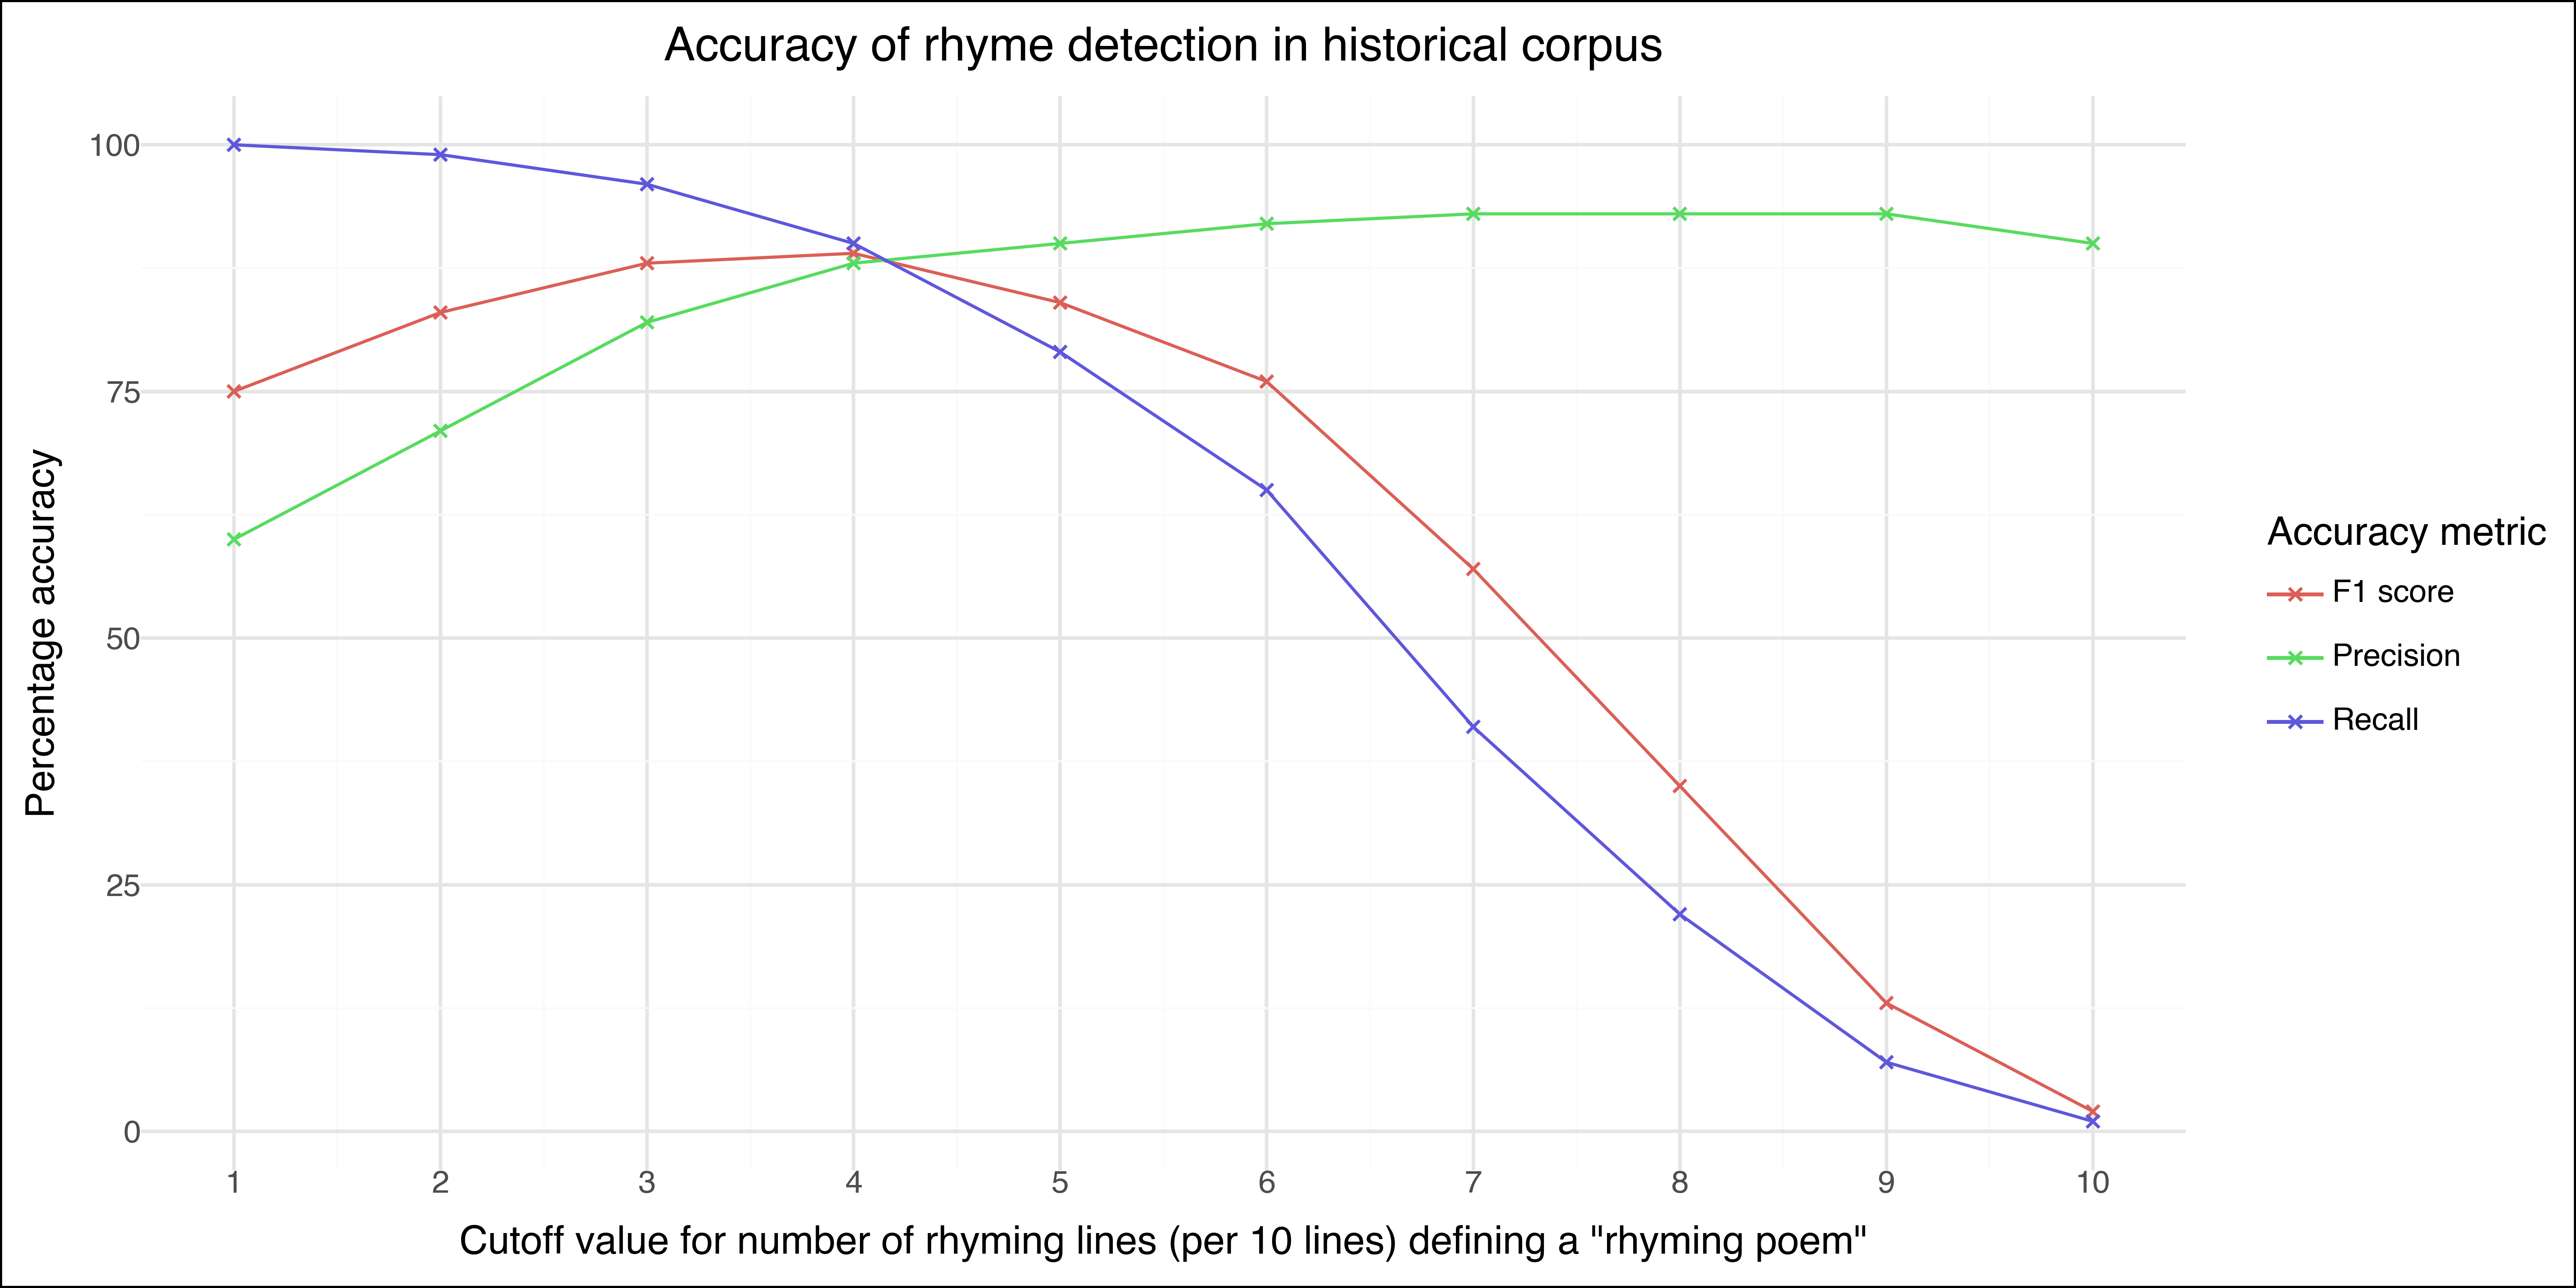

In [ ]:
def plot_rhyming_preds(df_preds, save_to=None):
    p9.options.figure_size = (10,5)
    p9.options.dpi=300
    
    figdf = df_preds.reset_index().melt(id_vars=['pred_by','opt'], value_vars=['f1_score','precision','recall'])
    figdf = figdf[figdf.opt!=0]
    figdf['value']*=100
    figdf['variable'] = figdf['variable'].apply(lambda x: x[0].upper() + x[1:].replace('_',' '))
    fig = p9.ggplot(figdf, p9.aes(x='opt', y='value', color='variable'))
    fig += p9.geom_line()
    fig +=p9.geom_point(shape='x')
    fig += p9.scale_x_continuous(breaks=range(0,11,1))
    fig += p9.labs(
        x='Cutoff value for number of rhyming lines (per 10 lines) defining a "rhyming poem"',
        y='Percentage accuracy',
        color='Accuracy metric',
        title='Accuracy of rhyme detection in historical corpus'
    )
    fig += p9.theme_minimal()
    fig += p9.theme(panel_background=p9.element_rect(fill='white'), plot_background=p9.element_rect(fill='white'))

    fig += p9.theme(
        # axis_title=p9.element_text(size=8),
        # legend_title=p9.element_text(size=8),
        # legend_text=p9.element_text(size=8),
        # axis_text=p9.element_text(size=8),
        # legend_position='bottom'
    )
    fig.save('../figures/predicted_rhyme_avgs_f1.png')
    fig

## Measuring rhyme in corpus

In [ ]:
df_corpus = get_rhyme_for_sample('../data/corpus_sample_by_period_subcorpus.csv.gz')
df_corpus = df_corpus[df_corpus.subcorpus.isin({'English Poetry', 'American Poetry', 'African-American Poetry'})]
df_corpus

,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,...,num_rhyming_lines,num_perfectly_rhyming_lines,num_lines_prosodic,perc_rhyming_lines,perc_perfectly_rhyming_lines,num_rhyming_lines_per10l,num_perfectly_rhyming_lines_per10l,rhyme_bool,rhyme_pred,rhyme_pred_perc
id,,,,,,,,,,,,,,,,,,,,,
c20-english/ep20152/Z200586158,2,1900-1999 Twentieth-Century,English Poetry,"Rosenberg, Isaac, 1890-1918",1890.0,‘I KNOW YOU GOLDEN’,1920,12,,I know you golden,...,6,2,12,50.000000,16.666667,5,2,None,False,0
english/kerpeter/Z300410015,3,1660-1700 Restoration,English Poetry,"Ker, Patrick, fl. 1691",1691.0,On the Memory of a Married Maid.,1721,16,Flosculum Poeticum (1684),A Marrie'd&hyphen;Virgin to remain.,...,13,11,16,81.250000,68.750000,8,7,True,True,100
american/am1258/Z200196105,7,1835-1869 Mid Nineteenth-Century,American Poetry,"Emerson, Ralph Waldo, 1803-1882",1803.0,SEPTEMBER,1833,16,Poems [1904],"&indent;Of a gusty Autumn day,",...,12,2,16,75.000000,12.500000,8,1,True,False,0
english/gilfilla/Z400379001,8,1800-1834 Early Nineteenth-Century,English Poetry,"Gilfillan, Robert, 1798-1850",1798.0,NORWEGIAN SMUGGLER'S SONG.,1828,36,Poems and Songs (1851),"&indent;The storm is loud and high,",...,23,14,36,63.888889,38.888889,6,4,True,True,100
english/wattwill/Z300523577,18,1800-1834 Early Nineteenth-Century,English Poetry,"Watt, William, 1793-1859",1793.0,BAB AT THE BOWSTER.,1823,40,Poems and Songs (1860),Wi' touslet hair and drowsy een?,...,17,15,40,42.500000,37.500000,4,4,True,True,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
african-american/harperfr/Z200387534,997277,1870-1899 Later Nineteenth-Century,African-American Poetry,"Harper, Frances Ellen Watkins, 1825-1911",1825.0,OUT IN THE COLD,1855,28,Complete Poems (1988),"Out in the cold mid the dreary night,",...,28,24,28,100.000000,85.714286,10,9,True,True,100
c20-african-american/da22004/Z200570740,998323,1900-1999 Twentieth-Century,African-American Poetry,"Mitchell, Karen, 1955-",1955.0,Where Have the Black Sheep Gone?,1985,46,,Last night my daughter came to me,...,10,2,43,23.255814,4.651163,2,0,None,False,0
c20-african-american/da20076/Z300330273,999377,1900-1999 Twentieth-Century,African-American Poetry,"Weaver, Michael S., 1951-",1951.0,Duke Ellington and His Mistress Make Love,1981,34,,I draw the sheets written with life,...,24,18,30,80.000000,60.000000,8,6,None,True,100


In [ ]:
def get_avgs_df(df, gby=['period'], min_size=10):
    odf = pd.DataFrame(
        [
            {
                **dict(zip(gby,g)), 
                **dict(gdf.reset_index().assign(size=len(gdf)).mean(numeric_only=True)),
                'perc_rhyming_lines2': gdf['num_rhyming_lines'].sum() / gdf['num_lines'].sum() * 100,
                'perc_perfectly_rhyming_lines2': gdf['num_perfectly_rhyming_lines'].sum() / gdf['num_lines'].sum() * 100
            }
            for g,gdf in df.groupby(gby)
            if len(gdf) >= min_size
        ]
    )
    return odf

df_avgs = get_avgs_df(df_corpus)
df_avgs[['period','rhyme_pred_perc']].sort_values('period')

,period,rhyme_pred_perc
0,1600-1650,91.213701
1,1650-1700,88.753515
2,1700-1750,88.458675
3,1750-1800,86.922061
4,1800-1850,84.697089
5,1850-1900,69.492657
6,1900-1950,14.071357
7,1950-2000,4.432624


In [ ]:
def plot_predicted_rhyme_avgs(figdf, y='rhyme_pred_perc', x='period', gby=['period'], color=None, limits=[0,100], min_size=10):
    figdf = get_avgs_df(figdf, gby=gby, min_size=min_size)
    # periods=list(df[x].unique())
    # figdf[x]=pd.Categorical(figdf[x],categories=sorted(periods,reverse=False))
    return (
        p9.ggplot(
            figdf,
            p9.aes(
                x=x,
                y=y,
                **{'color':color, 'group':color} if color else {}
            )
        )
        + p9.geom_line(data=figdf.groupby(['period','subcorpus']).median(numeric_only=True).reset_index()) 
        # + p9.geom_boxplot(outlier_size=0)
        + p9.geom_point(p9.aes(size='size'), shape='x') 
        + p9.geom_hline(yintercept=50, color='black', linetype='dashed', size=.5, alpha=.5)
        + p9.theme(legend_position='bottom') 
        + p9.theme_minimal() 
        + p9.theme(panel_background=p9.element_rect(fill='white'), plot_background=p9.element_rect(fill='white'))
        + p9.scale_y_continuous(limits=limits)
        + p9.theme(axis_text_x=p9.element_text(angle=45))
        + p9.labs(
            x='Half-century of poet\'s birth',
            y='Predicted percentage of poems with rhyme',
        )

    )

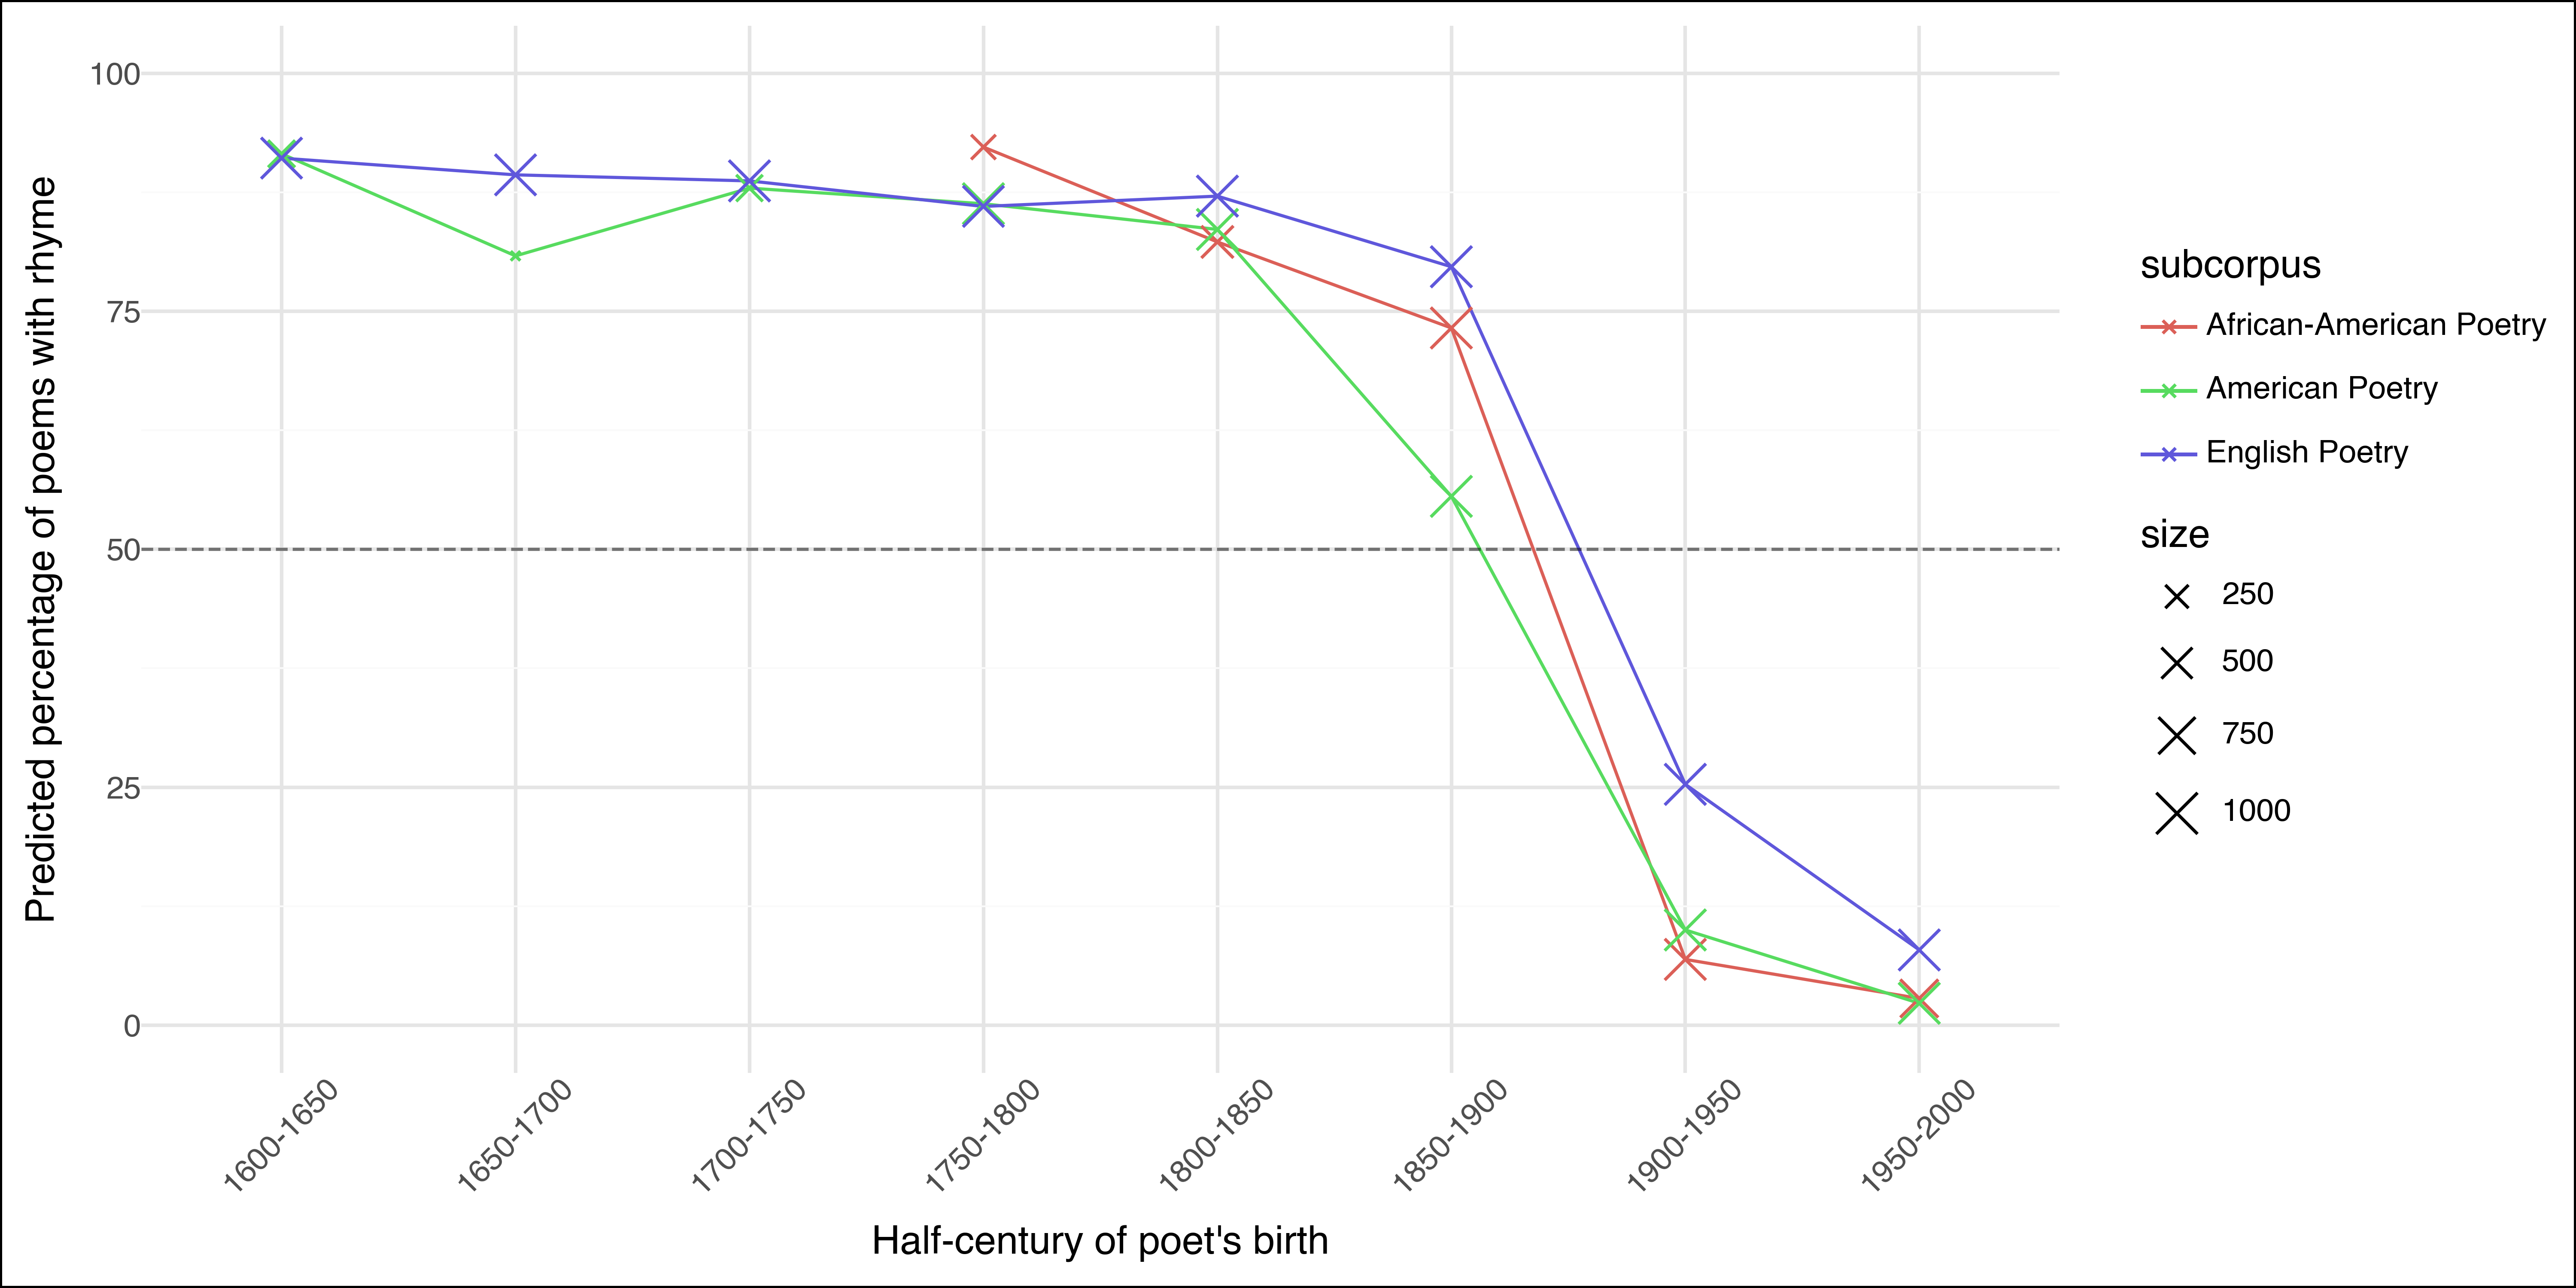

In [ ]:
plot_predicted_rhyme_avgs(df_corpus, gby=['period','subcorpus'], color='subcorpus')